<h1><strong>Proyecto Final</strong>
<h2><strong>Analisis al Dataset Heart Disease
<h2><strong>Presentado por: Yeison Alfredo Micolta Rodriguez
<h2><strong>Bootcamp: Analisis de datos nivel ingtegrador<br>
<strong>Presentado a: TalentoTech


Caso de estudio: análisis del dataset Heart Disease y determinar que modelo de clasificación es mejor para realizar entrenamiento y prediccion con este dataset. <br>

Objetivos:
- Explorar el dataset
- Realizar limpieza de datos
- Determinar las variables para realizar el entrenamiento
- Entrenar y probar el modelo creado
- graficar y dar conclusiones respecto al modelo<br><br>

Case study: analysis of the cardiac disease dataset and determine which classification model is best to perform training and prediction with this dataset. <br>

Objectives:
- Explore the dataset
- Perform data cleaning
- Determine the variables for training
- Train and test the created model
- Plot and draw conclusions about the model

Dataset --->> https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
Video corto explicativo --> https://youtu.be/PwjuqxsysSw


#Variables

# Categóricas - Categoricals
- Sex: 1 para hombres y 0 para mujeres.
- CP: Categorías numéricas que representan diferentes tipos de dolor en el pecho.
- Fbs: Nivel de azucar; 1 si el nivel de azúcar en sangre en ayunas es superior a 120 mg/dL, 0 en caso contrario.
- Restecg: Categorías numéricas que indican los resultados del ECG en reposo.
- Exang: 1 si se presenta angina inducida por ejercicio, 0 en caso contrario.
- Slope: Categorías numéricas que describen la pendiente del segmento ST durante el ejercicio.
- CA: Número de vasos principales coloreados por fluoroscopia.
- Thal: El estado del corazón según la prueba de Thallium.
- Target: Variable de destino binaria (0 = no enfermedad cardíaca, 1 = enfermedad cardíaca).


# Numéricas - Numericals
- Age: La edad del paciente en años.
- Trestbps: La presión arterial sistólica en mm Hg.
- Chol: Nivel de colesterol sérico en mg/dL.
- Thalach: Frecuencia cardíaca máxima alcanzada durante el ejercicio.
- Oldpeak: Depresión del segmento ST en el ECG inducida por ejercicio en relación con el reposo.



# Import Libraries

#Importamos Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading Dataset
#Cargamos el Dataset

In [ ]:
#loading dataset
path="/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Code/ProyectoFinal/heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Show all row and columns
# Muestra todas las Filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


#Data exploration
#Exploración de datos

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Verificamos si existen filas repetidas
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 723


In [ ]:
# Encontrar registros duplicados
duplicados = df[df.duplicated()]

# Mostrar los duplicados junto con sus índices en el conjunto de datos
print("Registros duplicados junto con sus índices:")
print(duplicados.reset_index(drop=True))
duplicados.shape

Registros duplicados junto con sus índices:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     34    0   1       118   210    0        1      192      0      0.7   
1     50    0   1       120   244    0        1      162      0      1.1   
2     46    1   0       120   249    0        0      144      0      0.8   
3     55    1   0       140   217    0        1      111      1      5.6   
4     66    0   2       146   278    0        0      152      0      0.0   
5     29    1   1       130   204    0        0      202      0      0.0   
6     52    1   1       134   201    0        1      158      0      0.8   
7     46    1   2       150   231    0        1      147      0      3.6   
8     38    1   2       138   175    0        1      173      0      0.0   
9     37    0   2       120   215    0        1      170      0      0.0   
10    58    1   2       140   211    1        0      165      0      0.0   
11    63    1   0       140   187    0      

(723, 14)

Debido a la cantida tan elevada de datos duplicados dentro del dataset se realiza una verificacón manual de que si se eliminen las filas que son completamente iguales.

Lo verificaremos de la siguiente manera; usando la edad como filtro.<br><br>
Due to the high amount of duplicate data within the dataset, a manual check is made to ensure that the rows that are completely the same are removed.

We will check it in the following way; using age as a filter.

In [ ]:
# Calcular el número único de edades
numero_edades_unicas = df['age'].unique()
numero_edades_unicas.sort()
# Mostrar el número único de edades
print("Número único de edades en el conjunto de datos:", numero_edades_unicas)

Número único de edades en el conjunto de datos: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]


In [ ]:
#Registros exactamente iguales Filtrados por edad

# 29 = 3      41 = 22       48 = 16     55 = 22     62 = 26     69 = 6
# 34 = 4      42 = 18       49 = 12     56 = 28     63 = 23     70 = 10
# 35 = 11     43 = 18       50 = 14     57 = 40     64 = 24     71 = 8
# 37 = 4      44 = 25       51 = 27     58 = 49     65 = 19     74 = 2
# 38 = 10     45 = 17       52 = 30     59 = 32     66 = 18     76 = 2
# 39 = 10     46 = 16       53 = 18     60 = 26     67 = 22     77 = 2
# 40 = 8      47 = 13       54 = 37     61 = 23     68 = 8
#     50           129           154         220         140         30
# TOTAL = 723

In [ ]:
# Filtrar los datos por edad
datos_edad = df[df['age'] == 77]

# Mostrar los datos
print("Datos:")
datos_edad

Datos:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [ ]:
# Filtrar los datos por edad
datos_edad = duplicados[duplicados['age'] == 77]

# Mostrar los datos
print("Datos iguales:")
datos_edad

Datos iguales:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [ ]:
df_N = df.drop_duplicates()
df_N = df_N.reset_index(drop=True)
df_N

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# verificamos que no existan datos duplicados filtrado por la edad
datos_edad = df_N[df_N['age'] == 77]

# Mostrar los datos
print("Datos no iguales:")
datos_edad

Datos no iguales:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


Una vez eliminados los duplicados se explora nuevamente el dataset<br><br>
Once the duplicates have been removed, the dataset is scanned again.

In [ ]:
df_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
#Realizamos una descripción del dataset usando unicamente las variables numéricas del mismo

df_N[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


#Análisis Exploratorio de los Datos - EDA

#Column graphs
#Gráficas de comlumnas

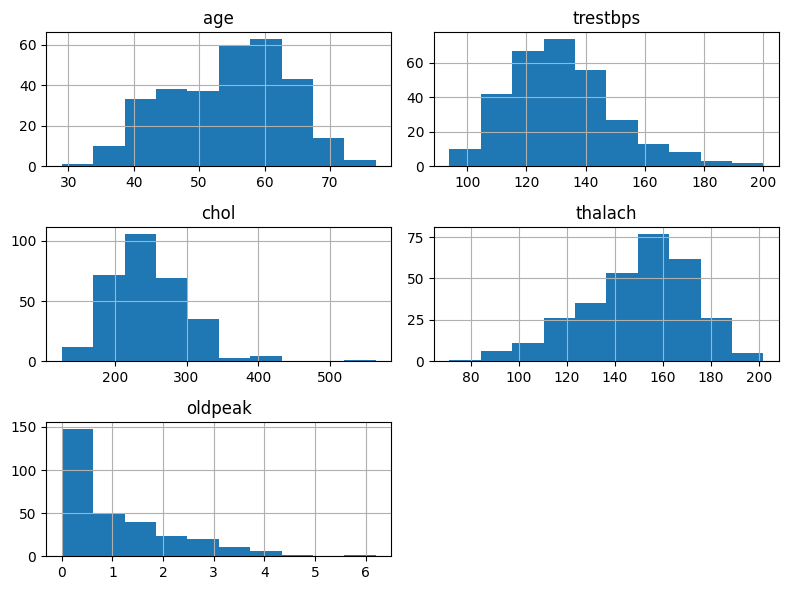

In [ ]:
df_N[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

<h3> Pacientes en el dataset
<h3> Patients in dataset

<ipython-input-18-a30b2ffeef20>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Set2')


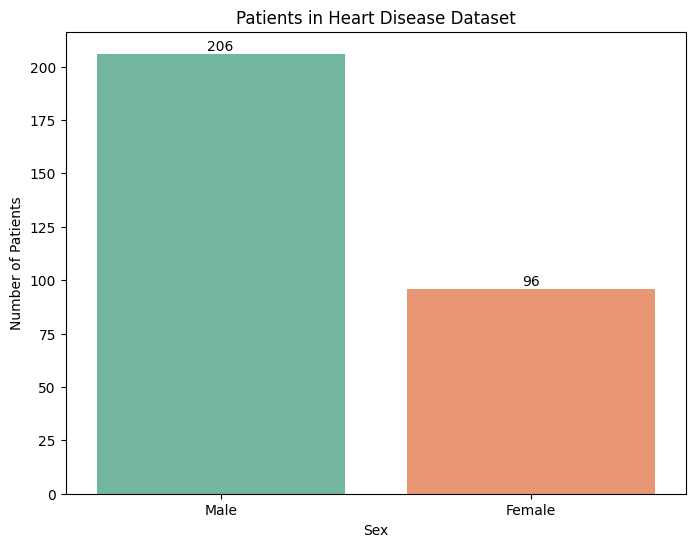

In [ ]:
# Convertir la columna 'sex' a categórica para mejor interpretación en la gráfica

df_N['sexMap'] = df_N['sex'].map({0: 'Female', 1: 'Male'})

# Contar la cantidad de pacientes masculinos y femeninos
sex_counts = df_N['sexMap'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.title('Patients in Heart Disease Dataset')

# Añadir la cantidad exacta en cada barra
for index, value in enumerate(sex_counts.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

Dentro del dataset de acuerdo con lo observado en la gráfica anterior el sexo femenino refleja un 32% de los datos conformado por 96 registros y el sexo masculino con 206 regitros ocupa el 68% de los datos del dataset.<br><br>
According to the graph above, the female sex accounts for 32% of the data (96 records) and the male sex (206 records) occupies 68% of the data in the dataset.

<h3>

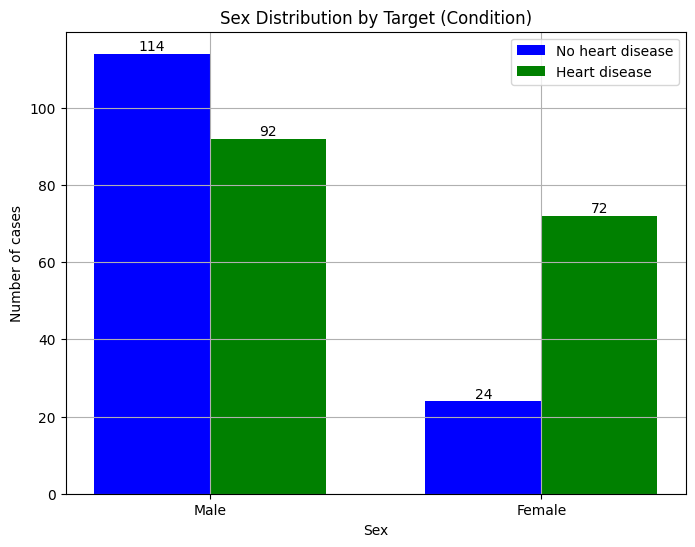

In [ ]:
# Filtrar por el valor de target
sin_enfermedad = df_N[df_N['target'] == 0]['sex']
con_enfermedad = df_N[df_N['target'] == 1]['sex']

# Obtener el número de hombres y mujeres con y sin enfermedad cardíaca
sin_enfermedad_hombres = sin_enfermedad[sin_enfermedad == 1].count()
sin_enfermedad_mujeres = sin_enfermedad[sin_enfermedad == 0].count()
con_enfermedad_hombres = con_enfermedad[con_enfermedad == 1].count()
con_enfermedad_mujeres = con_enfermedad[con_enfermedad == 0].count()

# Crear un histograma
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = [0, 1]

bars1 = plt.bar(index, [sin_enfermedad_hombres, sin_enfermedad_mujeres], bar_width, color='blue', label='No heart disease')
bars2 = plt.bar([i + bar_width for i in index], [con_enfermedad_hombres, con_enfermedad_mujeres], bar_width, color='green', label='Heart disease')

# Agregar etiquetas de texto
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.xlabel('Sex')
plt.ylabel('Number of cases')
plt.title('Sex Distribution by Target (Condition)')
plt.xticks([i + bar_width/2 for i in index], ['Male', 'Female'])
plt.legend()
plt.grid(True)
plt.show()

En la gráfica anterio se puede observar que existen más pacientes masculinos que femeninos pero en relación a la cantidad de pacientes por sexo (Masculino = 206, Femenino = 96) vemos que los pacientes masculinos que presentan una enfermedad cardíaca son el 44.6%, mientras que en las mujeres es el 75% teniendo en cuenta estos porcentajes se puede inferir que el sexo femenino es mas propenso a padecer una enfermedad cardica aunque el numero de pacientes no sea igual para ambos sexos.<br><br>
The above graph shows that there are more male than female patients, but in relation to the number of patients by sex (Male = 206, Female = 96) we see that 44.6% of male patients have heart disease, while 75% of female patients have heart disease, taking into account these percentages, it can be inferred that the female sex is more likely to suffer from heart disease, although the number of patients is not equal for both sexes.

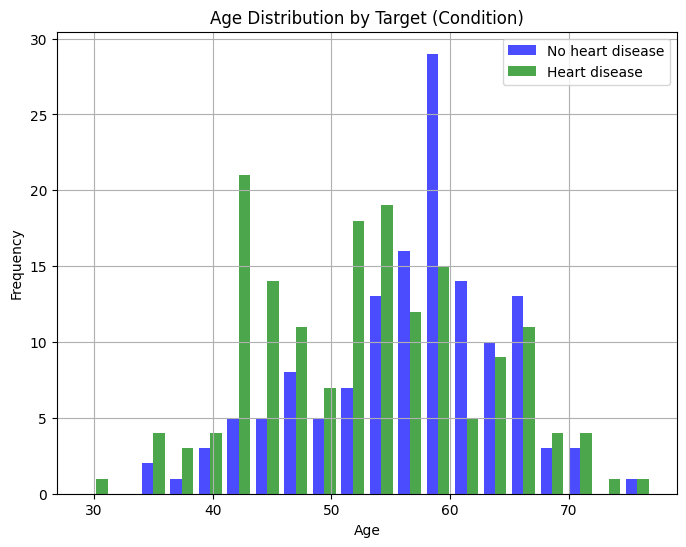

In [ ]:
# Filtrar por el valor de target
sin_enfermedad = df_N[df_N['target'] == 0]['age']
con_enfermedad = df_N[df_N['target'] == 1]['age']

# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist([sin_enfermedad, con_enfermedad], bins=20, color=['blue', 'green'], alpha=0.7, label=['No heart disease', 'Heart disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Target (Condition)')
plt.legend()
plt.grid(True)
plt.show()

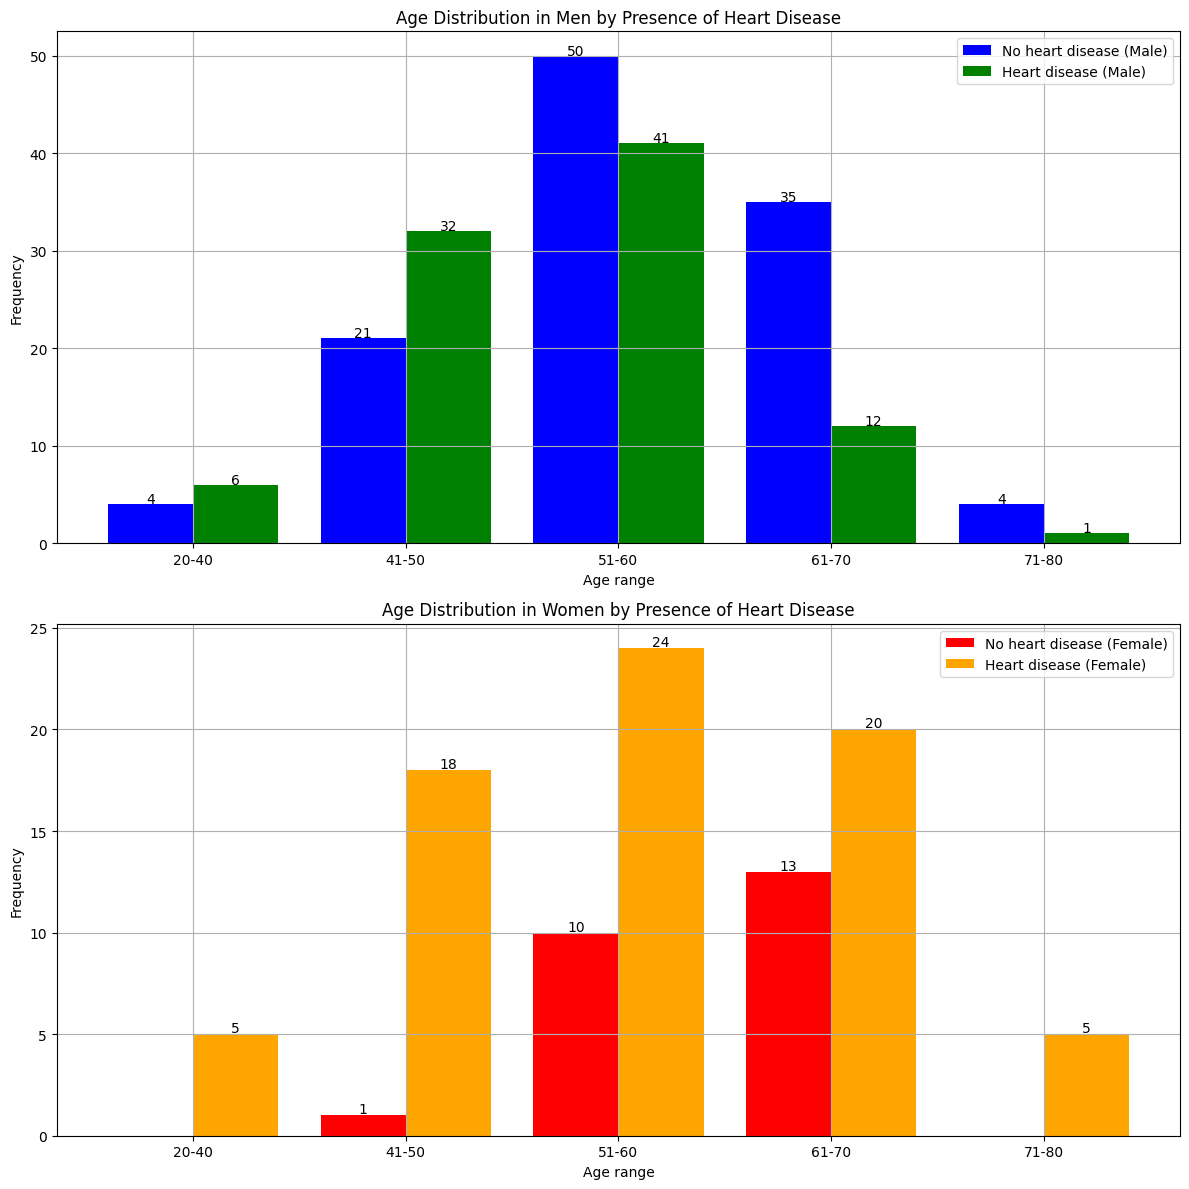

In [ ]:
# Crear una nueva columna 'age_range' para categorizar las edades
bins = [0, 40, 50, 60, 70, 80]
labels = ['20-40', '41-50', '51-60', '61-70', '71-80']
df_N['age_range'] = pd.cut(df_N['age'], bins=bins, labels=labels, right=False)

# Filtrar por sexo
male = df_N[df_N['sex'] == 1]
female = df_N[df_N['sex'] == 0]

# Crear la figura y los ejes para gráficos separados
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Histograma para hombres
male_no_disease = male[male['target'] == 0]['age_range'].value_counts().sort_index()
male_disease = male[male['target'] == 1]['age_range'].value_counts().sort_index()
width = 0.4
axs[0].bar(male_no_disease.index, male_no_disease.values, width=-width, align='edge', color='blue', label='No heart disease (Male)')
axs[0].bar(male_disease.index, male_disease.values, width=width, align='edge', color='green', label='Heart disease (Male)')
axs[0].set_xlabel('Age range')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Age Distribution in Men by Presence of Heart Disease')
axs[0].legend()
axs[0].grid(True)

# Añadir la cantidad exacta en cada barra para hombres
for i in range(len(axs[0].patches)):
    height = axs[0].patches[i].get_height()
    if height > 0:
        axs[0].text(axs[0].patches[i].get_x() + axs[0].patches[i].get_width() / 2, height + 0.1, f'{int(height)}', ha='center')

# Histograma para mujeres
female_no_disease = female[female['target'] == 0]['age_range'].value_counts().sort_index()
female_disease = female[female['target'] == 1]['age_range'].value_counts().sort_index()
axs[1].bar(female_no_disease.index, female_no_disease.values, width=-width, align='edge', color='red', label='No heart disease (Female)')
axs[1].bar(female_disease.index, female_disease.values, width=width, align='edge', color='orange', label='Heart disease (Female)')
axs[1].set_xlabel('Age range')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Age Distribution in Women by Presence of Heart Disease')
axs[1].legend()
axs[1].grid(True)

# Añadir la cantidad exacta en cada barra para mujeres
for i in range(len(axs[1].patches)):
    height = axs[1].patches[i].get_height()
    if height > 0:
        axs[1].text(axs[1].patches[i].get_x() + axs[1].patches[i].get_width() / 2, height + 0.1, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()

Respecto al gráfico de distribución de edad por presencia de enfermedad agrupado por rangos podemos decir que el rango de edad en el que más hay presencia de enfermedad cardíaca está entre 41-70 años para ambos sexos, siendo un poco más minuncioso observamos que en el rango de edad de 41-50 hay un ligero decrecimiento de pacientes enfermos, en el rango de 61-70 el decrecimiento es mucho más notorio y el pico más alto está en el rango de 51-60 en el caso de los varones, para las mujeres vemos que existe un ligero decrecimiento en los mismos rangos que los varones; ademas, cabe rasaltar que los casos de pacientes enfermos superan por mucho a los pacientes sanos en el caso de las mujeres, en los varones solo los rangos de 20-40 y 41-50 los enfermos están por encima de los sanos.<br><br>
Regarding the graph of age distribution by presence of disease grouped by ranges we can say that the age range in which there is more presence of heart disease is between 41-70 years for both sexes, being a little more detailed we observe that in the age range of 41-50 there is a slight decrease of sick patients, in the range of 61-70 the decrease is much more noticeable and the highest peak is in the range of 51-60 in the case of men, for women we see that there is a slight decrease in the same ranges as men; In addition, it is worth noting that the cases of sick patients far outnumber healthy patients in the case of women; in the case of men, only in the 20-40 and 41-50 ranges are the sick patients above the healthy ones.

<ipython-input-22-0c54aa560cd1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Set2')


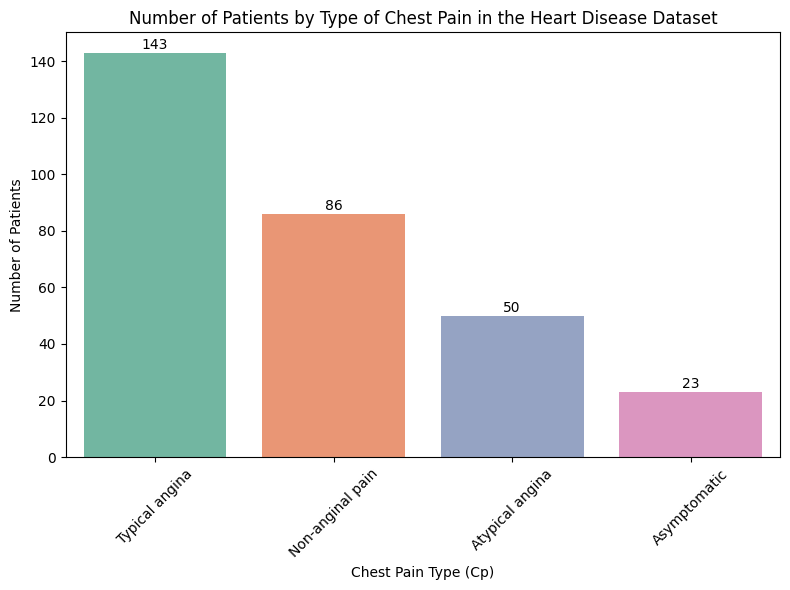

In [ ]:
# Mapear los valores de cp para una mejor interpretación en la gráfica
cp_labels = {0: 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'}
df_N['cpMap'] = df_N['cp'].map(cp_labels)

# Calcular el recuento y el porcentaje de cada tipo de cp
cp_counts = df_N['cpMap'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Chest Pain Type (Cp)')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Type of Chest Pain in the Heart Disease Dataset')

# Añadir la cantidad exacta en cada barra
for index, value in enumerate(cp_counts.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observando el gráfico anterior nos damos cuenta que 143 pacientes presentaron angina tipica, es decir, el tipico dolor en el pecho, 86 presentaron dolor no anginoso, 50 presentaron angina atípica y solo 23 estuvieron asintomaticos , es decir, no presentan dolor en el pecho. <br><br>
Looking at the graph above, 143 patients had typical angina, i.e., typical chest pain, 86 had non-anginal pain, 50 had atypical angina and only 23 were asymptomatic, in other words, they had no chest pain.

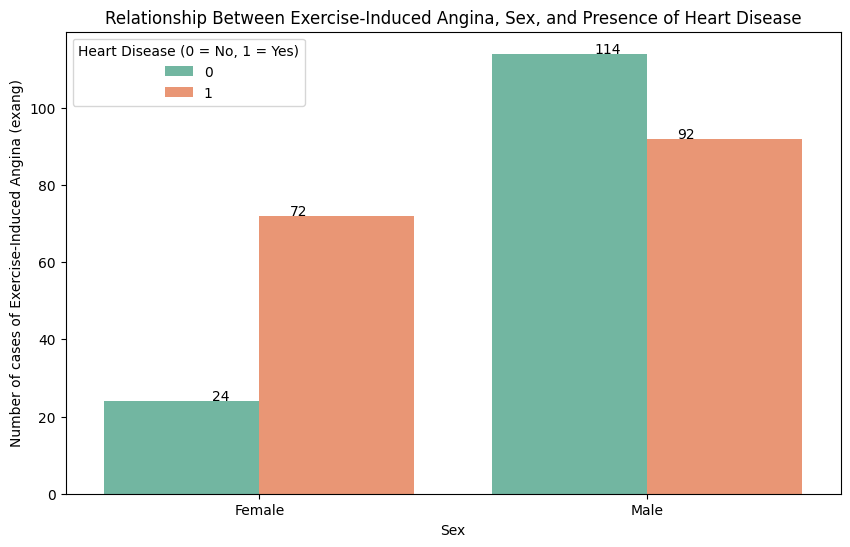

In [ ]:
# Contar la cantidad de valores de exang para cada combinación de sex y target
exang_counts = df_N.groupby(['sex', 'target'])['exang'].count().reset_index()

# Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='exang', hue='target', data=exang_counts, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Sex')
plt.ylabel('Number of cases of Exercise-Induced Angina (exang)')
plt.title('Relationship Between Exercise-Induced Angina, Sex, and Presence of Heart Disease')

# Mostrar la cantidad de casos encima de cada barra
for index, row in exang_counts.iterrows():
    plt.text(row['sex'] + (row['target'] - 0.5) * 0.2, row['exang'] + 0.1, f"{row['exang']}", color='black', ha="center")

# Mostrar la gráfica
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

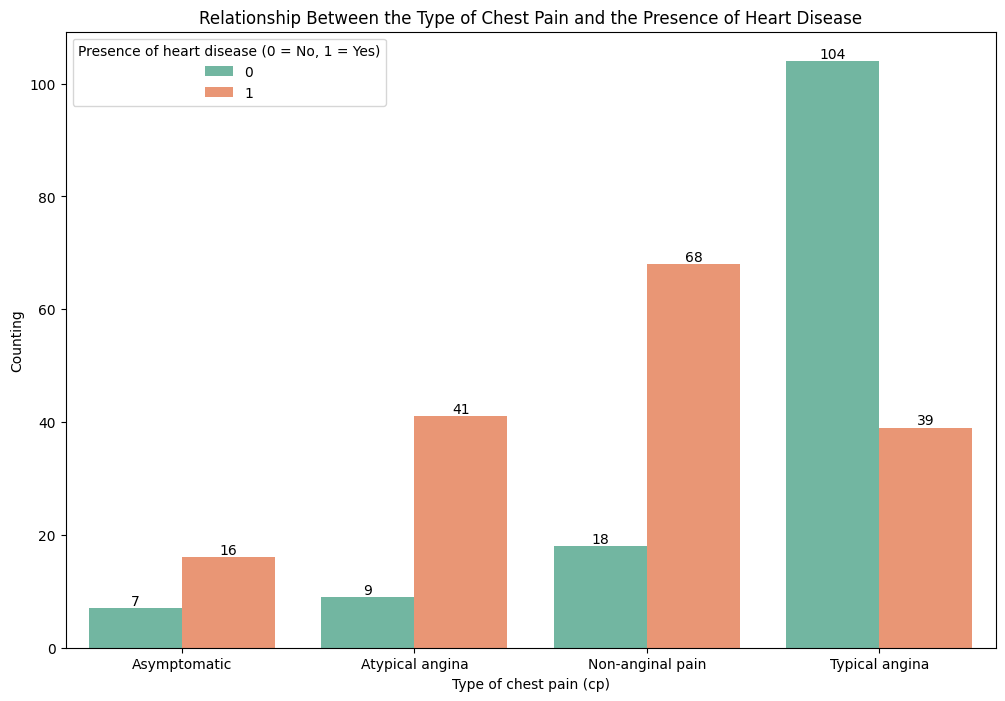

In [ ]:
cp_target_counts = df_N.groupby(['target', 'cpMap']).size().reset_index(name='counts')

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='cpMap', y='counts', hue='target', data=cp_target_counts, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Type of chest pain (cp)')
plt.ylabel('Counting')
plt.title('Relationship Between the Type of Chest Pain and the Presence of Heart Disease')

# Añadir los valores exactos en cada barra
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

# Mostrar la gráfica
plt.legend(title='Presence of heart disease (0 = No, 1 = Yes)')
plt.show()

En los tipos de dolor en el pecho como lo son la angina atípica, dolor no anginal, incluso los asintomaticos presentan una elevada presencia de pacientes con enfermedad cardíaca en relacion con los pacientes sanos, en la angina típica por el contrario los pacientes que no tienen enfermedad cardíaca son mucho más que los que sí la tienen. <br><br>
En los tipos de dolor en el pecho como lo son la angina atípica, dolor no anginal, incluso los asintomaticos presentan una elevada presencia de pacientes con enfermedad cardíaca en relacion con los pacientes sanos, en la angina típica por el contrario los pacientes que no tienen enfermedad cardíaca son mucho más que los que sí la tienen.

<h3> Tensión arterial (Trestbps) vs Condición (Target)
<h3> Blood Pressure (Trestbps) vs Condition (Target)

<ipython-input-25-7824e9eb79c9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sin_enfermedad_mujeres = df_N[(df_N['target'] == 0) & (df['sex'] == 0)]['trestbps']
<ipython-input-25-7824e9eb79c9>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  con_enfermedad_mujeres = df_N[(df_N['target'] == 1) & (df['sex'] == 0)]['trestbps']


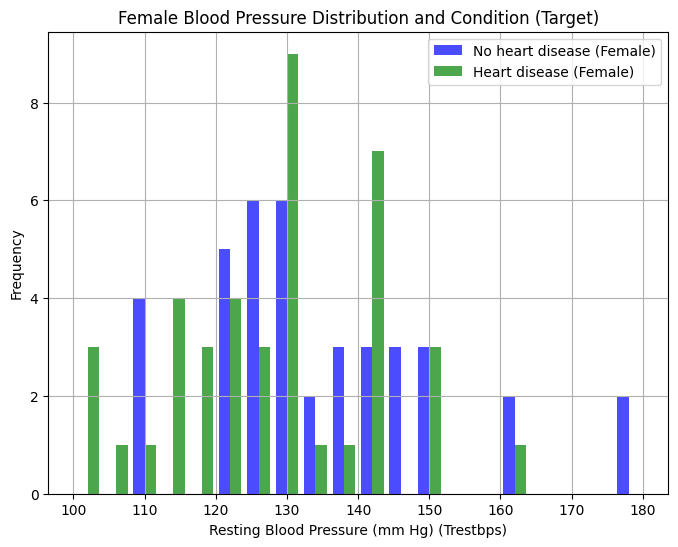

In [ ]:
# Filtrar por el valor de target

sin_enfermedad_mujeres = df_N[(df_N['target'] == 0) & (df['sex'] == 0)]['trestbps']
con_enfermedad_mujeres = df_N[(df_N['target'] == 1) & (df['sex'] == 0)]['trestbps']

# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist([sin_enfermedad_mujeres, con_enfermedad_mujeres], bins=20, color=['blue', 'green'], alpha=0.7, label=['No heart disease (Female)', 'Heart disease (Female)'])

plt.xlabel('Resting Blood Pressure (mm Hg) (Trestbps)')
plt.ylabel('Frequency')
plt.title('Female Blood Pressure Distribution and Condition (Target)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-26-8f8f9eb67b88>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sin_enfermedad_hombres = df_N[(df_N['target'] == 0) & (df['sex'] == 1)]['trestbps']
<ipython-input-26-8f8f9eb67b88>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  con_enfermedad_hombres = df_N[(df_N['target'] == 1) & (df['sex'] == 1)]['trestbps']


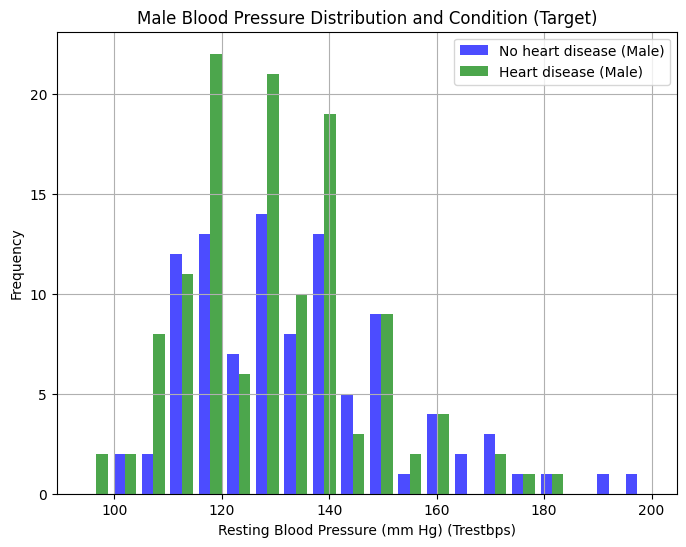

In [ ]:
# Filtrar por el valor de target
sin_enfermedad_hombres = df_N[(df_N['target'] == 0) & (df['sex'] == 1)]['trestbps']
con_enfermedad_hombres = df_N[(df_N['target'] == 1) & (df['sex'] == 1)]['trestbps']

# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist([sin_enfermedad_hombres, con_enfermedad_hombres], bins=20, color=['blue', 'green'], alpha=0.7, label=['No heart disease (Male)', 'Heart disease (Male)'])

plt.xlabel('Resting Blood Pressure (mm Hg) (Trestbps)')
plt.ylabel('Frequency')
plt.title('Male Blood Pressure Distribution and Condition (Target)')
plt.legend()
plt.grid(True)
plt.show()

Analizando las 2 gráficas de distribución de la tensión arterial diferente de cada sexo relacionada con la presencia de enfermedad cardíaca; nos damos cuenta que no es necesario presentar una tensión arterial muy exacebarda para padecer una enfermedad cardíaca ademas, existen pacientes con la tensión arterial muy elevada y no presentan alguna enfermedad cardíaca según los datos que presenta el dataset.<br><br>
Analyzing the 2 distribution graphs of the different blood pressure of each sex related to the presence of heart disease, we realize that it is not necessary to have a very high blood pressure to suffer from heart disease; moreover, there are patients with very high blood pressure who do not have heart disease according to the data presented in the dataset.

<ipython-input-27-12c0b05f454d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='fbs', data=fbs_counts, palette='Set1')


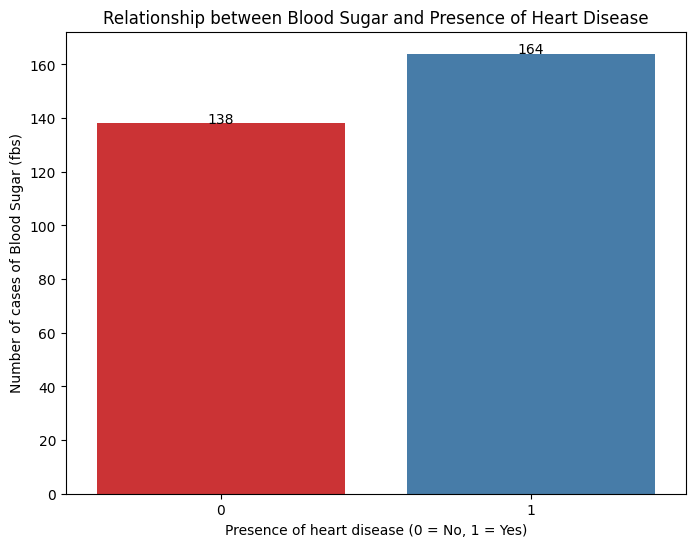

In [ ]:
fbs_counts = df_N.groupby('target')['fbs'].count().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='fbs', data=fbs_counts, palette='Set1')

# Añadir etiquetas y título
plt.xlabel('Presence of heart disease (0 = No, 1 = Yes)')
plt.ylabel('Number of cases of Blood Sugar (fbs)')
plt.title('Relationship between Blood Sugar and Presence of Heart Disease')

# Mostrar la cantidad de casos encima de cada barra
for index, row in fbs_counts.iterrows():
    plt.text(row['target'], row['fbs'] + 0.1, f"{row['fbs']}", color='black', ha="center")

# Mostrar la gráfica
plt.show()

En la gráfica anterior se puede observar que la cantidad de pacientes con enfermedad del corazón es mayor y presentan mayor nivel de azucar en la sangre que los que no tienen enfermedad según lo datos suministrados en este dataset.<br><br>
The graph above shows that the number of patients with heart disease is higher and they have higher blood sugar levels than those without the disease according to the data provided in this dataset.

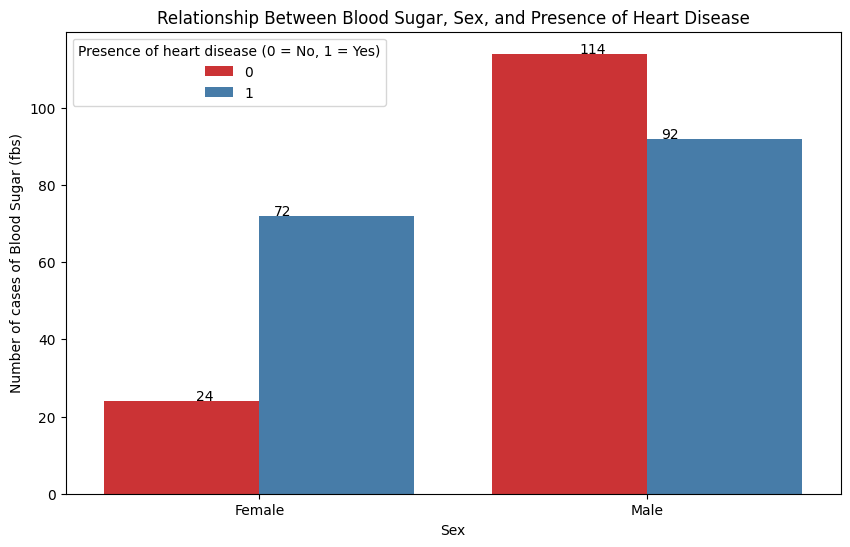

In [ ]:
# Contar la cantidad de valores de fbs para cada combinación de sex y target
fbs_counts = df_N.groupby(['sex', 'target'])['fbs'].count().reset_index()

# Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='fbs', hue='target', data=fbs_counts, palette='Set1')

# Añadir etiquetas y título
plt.xlabel('Sex')
plt.ylabel('Number of cases of Blood Sugar (fbs)')
plt.title('Relationship Between Blood Sugar, Sex, and Presence of Heart Disease')

# Mostrar la cantidad de casos encima de cada barra
for index, row in fbs_counts.iterrows():
    plt.text(row['sex'] + (row['target'] - 0.7) * 0.2, row['fbs'] +0.1, f"{row['fbs']}", color='black', ha="center")

# Mostrar la gráfica
plt.legend(title='Presence of heart disease (0 = No, 1 = Yes)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Esta gráfica tiene el mismo comportamiento que la grafica de Angina Inducida por Ejercicio, mostrando que en relación a la cantidad de pacientes por cada sexo, el femenino presenta más pacientes con el azucar en la sangre elevado y con enfermedad cardíaca. <br><br>
This graph has the same behavior as the graph of Exercise Induced Angina, showing that in relation to the number of patients per sex, the female presents more patients with elevated blood sugar and heart disease.

<ipython-input-29-19bf1f3020fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='chol', data=chol_means, palette='Set2')


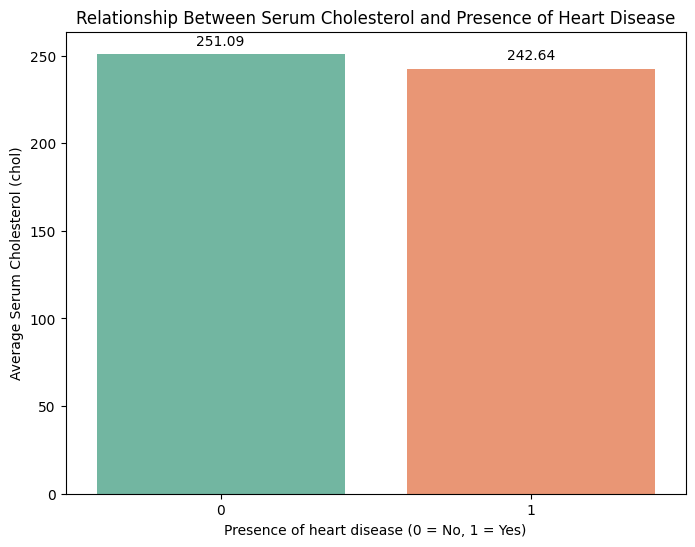

In [ ]:
# Calcular el promedio de chol para cada valor de target
chol_means = df_N.groupby('target')['chol'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='chol', data=chol_means, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Presence of heart disease (0 = No, 1 = Yes)')
plt.ylabel('Average Serum Cholesterol (chol)')
plt.title('Relationship Between Serum Cholesterol and Presence of Heart Disease')

# Mostrar los valores de los promedios encima de cada barra
for index, row in chol_means.iterrows():
    plt.text(row['target'], row['chol'] + 5, f"{row['chol']:.2f}", color='black', ha="center")

# Mostrar la gráfica
plt.show()

En la gráfica anterior se puede observar que el promedio de colesterol de pacientes con enfermedad del corazón es elevado en relación con los valores normales que debe estar por debajo de 200.<br><br>
The above graph shows that the average cholesterol level of patients with heart disease is elevated in relation to normal values, which should be below 200.

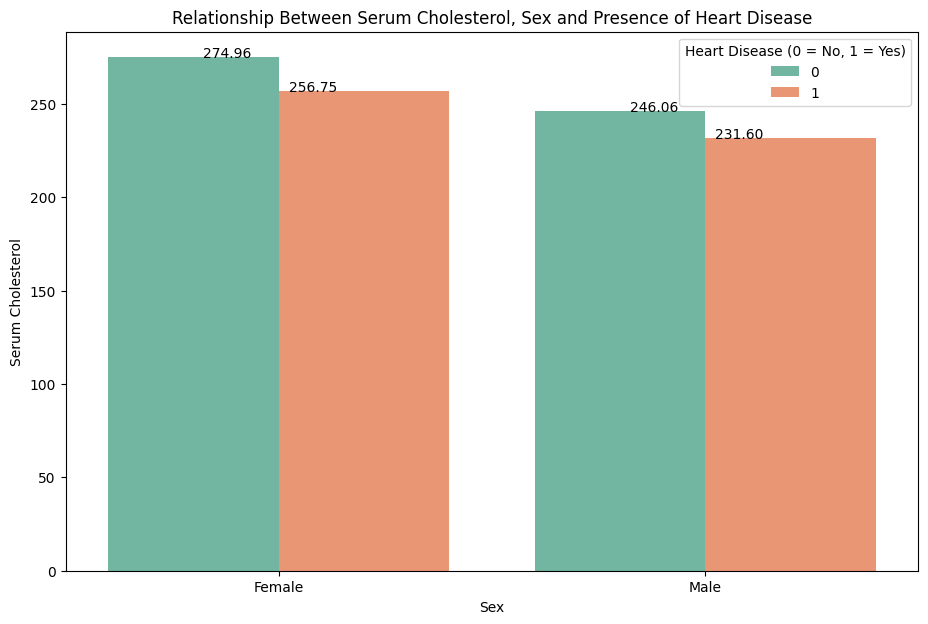

In [ ]:
# Calcular las medias de chol para cada combinación de sex y target
chol_means = df_N.groupby(['sex', 'target'])['chol'].mean().reset_index()

# Crear el gráfico de barras agrupado
plt.figure(figsize=(11, 7))
sns.barplot(x='sex', y='chol', hue='target', data=chol_means, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Sex')
plt.ylabel('Serum Cholesterol')
plt.title('Relationship Between Serum Cholesterol, Sex and Presence of Heart Disease')

# Mostrar la cantidad de promedios encima de cada barra
for index, row in chol_means.iterrows():
    plt.text(row['sex'] + (row['target'] - 0.6) * 0.2, row['chol'] + 0.1, f"{row['chol']:.2f}", color='black', ha="center")

# Mostrar la gráfica
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

En el gráfico anterior observamos que el promedio del colesterol de los paciente que presentan una enfermedad cardíaca es un poco más elevado en el sexo femenino que en el masculino, lo cual afianza más la idea de que las mujeres son más propensas a padecer enfermedades del corazón.
<br><br>
The above graph shows that the average cholesterol level of patients with heart disease is slightly higher in women than in men, which further supports the idea that women are more prone to heart disease.

#Matriz de correlación
#Correlation Matrix

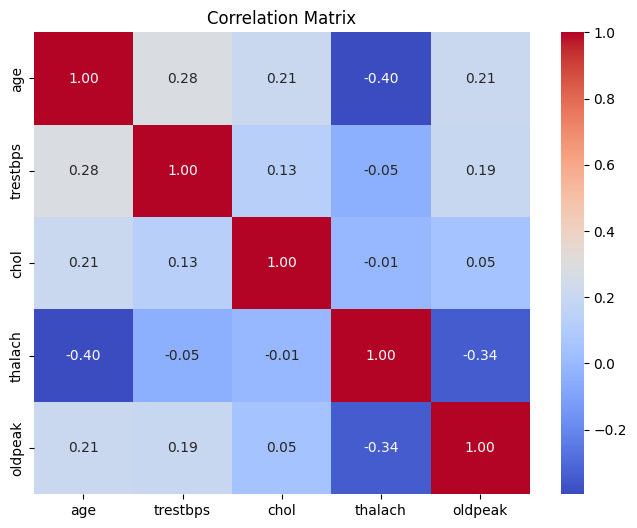

In [ ]:
m_corr = df_N[['age','trestbps','chol','thalach','oldpeak']].corr()
m_corr
plt.figure(figsize=(8, 6))
sns.heatmap(m_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

De acuerdo a la matriz de correlación observamos que no existe una relación fuerte entre las variables netamente numéricas que componen el dataset.
<br><br>

The correlation matrix shows that there is no strong relationship between the purely numerical variables that make up the dataset.

#Procesamiento de datos
#Data processing

<h3>Importamos bibliotecas
<h3>Importing libraries

Para este caso de estudio usaremos 3 algoritmos de clasificacion:
- LogisticRegression
- RandomForestClassifier
- SVC

For this case study we will use 3 classification algorithms:
- LogisticRegression
- RandomForestClassifier
- SVC

In [ ]:
#Particionar los datos
from sklearn.model_selection import train_test_split

#Estandarizar los datos
from sklearn.preprocessing import StandardScaler

#Crear modelo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Evaluar modelo
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score


<h3> Estandarización y partición de los datos para prueba y entrenamiento
<h3> Standardization and partitioning of test and training data

In [ ]:
X = df_N.drop(['target', 'sexMap', 'age_range', 'cpMap'], axis=1)
y = df_N['target']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test = scaler.transform(X_test)

# Verificar la estandarización
print("Media de X_train Normalizado:", np.mean(X_train, axis=0),"\n")
print("Desviación estándar de X_train Normalizado:", np.std(X_train, axis=0),"\n")

print("Media de X_test Normalizado:", np.mean(X_test, axis=0),"\n")
print("Desviación estándar de X_test Normalizado:", np.std(X_test, axis=0),"\n")

Media de X_train Normalizado: [ 9.76627723e-17 -6.26515898e-17  2.94831011e-17  4.12763415e-16
 -2.04539014e-16 -4.42246516e-17  8.10785279e-17  5.15954269e-16
 -5.89662021e-17  1.28988567e-17 -1.14247017e-16 -1.47415505e-17
 -2.24808646e-16] 

Desviación estándar de X_train Normalizado: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Media de X_test Normalizado: [ 0.07443961  0.01721412 -0.1960507   0.18476209 -0.13362158 -0.06207977
 -0.15941965  0.03923745 -0.12993114  0.16702042 -0.18373351 -0.01668451
 -0.10896061] 

Desviación estándar de X_test Normalizado: [0.9025015  0.99316491 1.01243936 1.06359345 0.79938605 0.93638444
 0.93955833 0.93215633 0.94630801 1.12017287 1.21875976 0.90819644
 1.08183907] 



In [ ]:
y_train.shape, X_train.shape

((241,), (241, 13))

In [ ]:
y_test.shape, X_test.shape

((61,), (61, 13))

<h2> Entrenamiento y evaluación de modelos
<h2> Training and evaluation of models

<h3>Regression Linear Model

In [ ]:
lr = LogisticRegression()
lrModel = lr.fit(X_train, y_train)

In [ ]:
lrModel_acc=lrModel.score(X_test, y_test)
print(f"Exactitud del modelo de regresión logística: {lrModel_acc:.4}")
print(f"Logistic Regression Model Accuracy:: {lrModel_acc:.4}")

Exactitud del modelo de regresión logística: 0.7705
Logistic Regression Model Accuracy:: 0.7705


In [ ]:
y_pred_lr = lrModel.predict(X_test)

In [ ]:
#f1 score
f1_score_lr = f1_score(y_test, y_pred_lr)
print("F1 Score for Logistic Regression Model:", f1_score_lr)

F1 Score for Logistic Regression Model: 0.787878787878788


In [ ]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.90      0.70      0.79        37

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



<h3>Matriz de confusón para el modelo de regresion logistica
<h3>Confusion Matrix for the Logistic Regression Model

In [ ]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

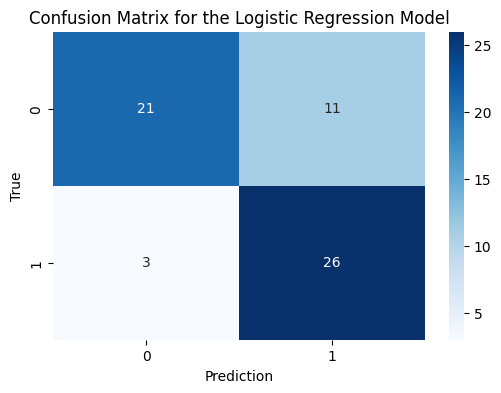

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')

# Añadir etiquetas y título
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix for the Logistic Regression Model')

# Mostrar la gráfica
plt.show()


<h3>Random Forest Classifier Model

In [ ]:
rf = RandomForestClassifier()
rfModel = rf.fit(X_train, y_train)

In [ ]:
rfModel_acc=rfModel.score(X_test, y_test)
print(f"Exactitud del modelo Random Forest Classifier: {rfModel_acc:.4}")
print(f"Random Forest Classifier Model Accuracy: {rfModel_acc:.4}")

Exactitud del modelo Random Forest Classifier: 0.8525
Random Forest Classifier Model Accuracy: 0.8525


In [ ]:
y_pred_rf = rfModel.predict(X_test)

In [ ]:
#f1 score
f1_score_rf = f1_score(y_test, y_pred_rf)
print("F1 Score for Random Forest Model:", f1_score_rf)

F1 Score for Random Forest Model: 0.8524590163934426


In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



<h3>Matriz de confusón para el modelo Random Forest Classifier
<h3>Confusion Matrix for Random Forest Classifier Model

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

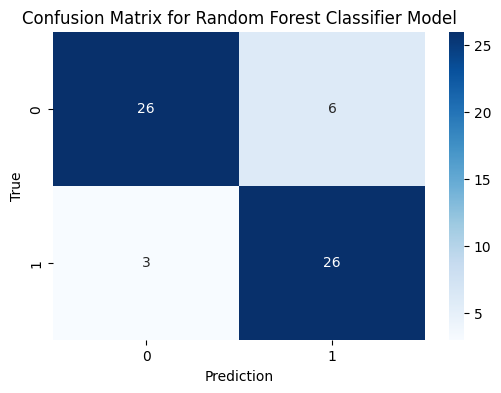

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')

# Añadir etiquetas y título
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier Model')

# Mostrar la gráfica
plt.show()


<h3>Support Vector Classifier Model (SVC)

In [ ]:
svc = SVC()
svcModel = svc.fit(X_train, y_train)

In [ ]:
svcModel_acc=svcModel.score(X_test, y_test)
print(f"Exactitud del modelo de Support Vector Classifier: {svcModel_acc:.4}")
print(f"Support Vector Classifier Model Accuracy: {svcModel_acc:.4}")


Exactitud del modelo de Support Vector Classifier: 0.7869
Support Vector Classifier Model Accuracy: 0.7869


In [ ]:
y_pred_svc = svcModel.predict(X_test)

In [ ]:
#f1 score
f1_score_svc = f1_score(y_test, y_pred_svc)
print("F1 Score for Support Vector Classifier Model:", f1_score_svc)

F1 Score for Support Vector Classifier Model: 0.7868852459016394


In [ ]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



<h3>Matriz de confusón para el modelo Support Vector Classifier

<h3>Confusion Matrix for Support Vector Classifier Model

In [ ]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

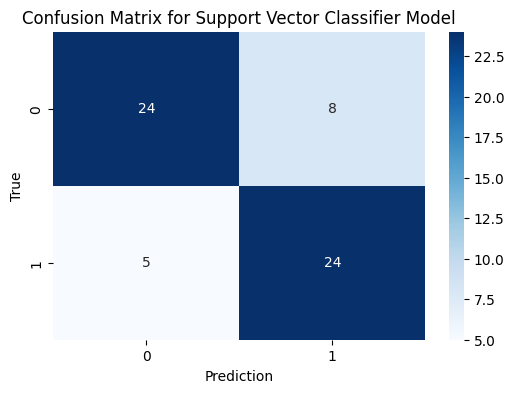

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d')

# Añadir etiquetas y título
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Classifier Model')

# Mostrar la gráfica
plt.show()


#Comparación de los Modelos usados
#Comparison of Models Used

<ipython-input-62-3f26ece8038c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette='Set2')


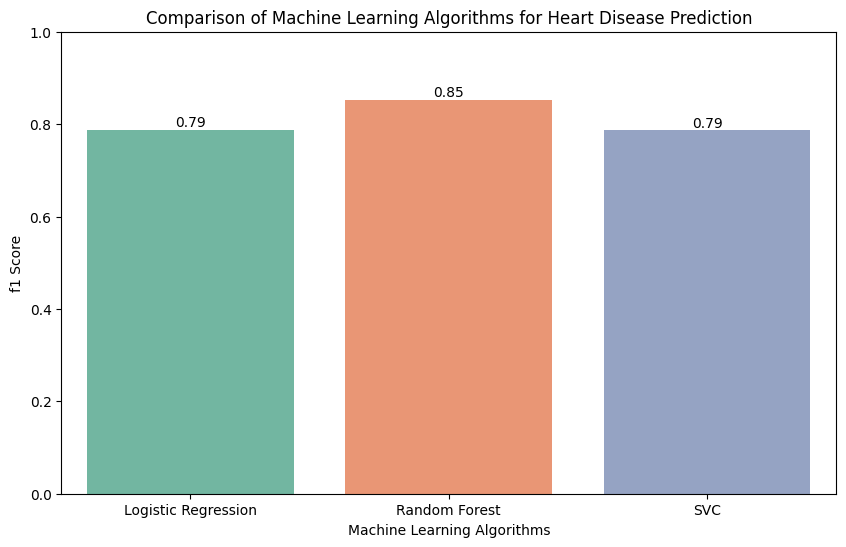

In [ ]:
# Crear una lista de nombres de modelos y sus respectivas métricas de precisión
model_names = ['Logistic Regression', 'Random Forest', 'SVC']
model_accuracies = [f1_score_lr, f1_score_rf, f1_score_svc]

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_accuracies, palette='Set2')

for i, model_accuracies in enumerate(model_accuracies):
    plt.text(i, model_accuracies, f'{model_accuracies:.2f}', ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Machine Learning Algorithms')
plt.ylim(0, 1)
plt.ylabel('f1 Score')
plt.title('Comparison of Machine Learning Algorithms for Heart Disease Prediction')

# Mostrar la gráfica
plt.show()


De acuerdo a la gráfica el algoritmo con mejor precisión para este dataset es el Random Forest Classifier con un 0.85 en f1 score, ademas en la matriz de confusión de mostró con mejores resultados teniendo 4 falsos positivos, 6 falsos negativos, 26 y 25 verdaderos positivos y verdaderos negativos respectivamente, cabe resaltar que no se usaron hiperparámetros los cuales pueden ayudar a que la precisión de los algoritmos mejore de manera significativa. Teniendo en cuenta la manera en la que fueron entrenados y usados los algoritmos por razones ya dadas el algoritmo que recomiendo usar para este tipo de datos es el Random Forest Classifier.<br><br>

According to the graph the algorithm with the best accuracy for this dataset is the Random Forest Classifier with 0.84 in accuracy, also in the confusion matrix it showed better results having 4 false positives, 6 false negatives, 26 and 25 true positives and true negatives respectively, it should be noted that hyperparameters were not used which can help the accuracy of the algorithms to improve significantly. Taking into account the way in which the algorithms were trained and used for reasons already given, the algorithm that I recommend to use for this type of data is the Random Forest Classifier.

#Trabajo Futuro

Para análisis posteriores se pueden cruzar todas las variables exceptuando el conjunto objetivo para dar observaciones más precisas y objetivas sobre como se relacionan las variables con el padecimiento de alguna enfermedad cardíaca.

En cuanto a los algoritmos podrían usarse como ya mencioné antes ademas, podría usar algoritmos de regresión o redes neuronales para observa si mejoran la precision y exactitud y tener un mejor desempeño en las predicciones.


#Conclusión

De acuerdo con los datos analizados el rango de edad que mayormente manifiesta tener una enfermedad cardíaca está entre los 41 y 60 años sin distinción de sexo, aunque las variables fueron analizadas únicamente en relacion a la condición si presentaban o no enfermedad cardiaca, en este primer análisi los datos reflejan que el sexo femenino es más propenso a padecer una enfermedad cardíaca debido a que presentan más valores por encima de lo normal o el rango máximo en cada una de las variables analizadas.

#Conclusion

According to the data analyzed, the age range with the highest prevalence of heart disease is between 41 and 60 years of age, regardless of sex, although the variables were analyzed only in relation to whether or not they had heart disease. In this first analysis, the data show that the female sex is more likely to suffer from heart disease because they have more values above normal or the maximum range in each of the variables analyzed.

#Bibliografía

\[1\] National Heart, Lung, and Blood Institute, "Causas de la angina," [En línea]. Disponible: https://www.nhlbi.nih.gov/es/salud/angina/causas. [Accedido: 20-may-2024].

\[2\] National Heart, Lung, and Blood Institute, "Angina: Información general," [En línea]. Disponible: https://www.nhlbi.nih.gov/es/salud/angina#:~:text=La%20angina%2C%20tambi%C3%A9n%20conocida%20como,se%20obstruyen%20parcial%20o%20totalmente. [Accedido: 20-may-2024].

\[3\] MedlinePlus, "Angina," [En línea]. Disponible: https://medlineplus.gov/spanish/angina.html. [Accedido: 21-may-2024].

\[4\] MedlinePlus, "Niveles de colesterol," [En línea]. Disponible: https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/. [Accedido: 21-may-2024].

\[5\] Instituto de Rehabilitación Funcional La Salle, "Frecuencia cardíaca en una prueba de esfuerzo," [En línea]. Disponible: https://www.irflasalle.es/frecuencia-cardiaca-en-una-prueba-de-esfuerzo/. [Accedido: 21-may-2024].

\[6\] Mayo Clinic, "Prueba de esfuerzo nuclear," [En línea]. Disponible: https://www.mayoclinic.org/es/tests-procedures/nuclear-stress-test/about/pac-20385231. [Accedido: 22-may-2024].

\[7\] Goshen Health, "Prueba de esfuerzo nuclear," [En línea]. Disponible: https://goshenhealth.com/es-MX/servicios-y-condiciones/prueba-de-esfuerzo-nuclear. [Accedido: 22-may-2024].

\[8\] My EKG, "Segmento ST: Interpretación en el EKG," [En línea]. Disponible: https://www.my-ekg.com/como-leer-ekg/segmento-st.html. [Accedido: 22-may-2024].